### Telecom X - Análisis de Evasión de Clientes
<p>Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.</p>

<p>Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.</p>

¿Qué vas a practicar?
<ul>
<li>
✅ Importar y manipular datos desde una API de manera eficiente.
</li>
<li>
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
</li>
<li>
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
</li>
<li>
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.
</li>
</ul>

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

# 📌 Extracción

In [84]:
import pandas as pd
import requests
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Manera Local
# df = pd.read_json('./TelecomX_Data.json')
# df.head()
# Manera API
response = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")
data = response.json()
df = pd.json_normalize(data).set_index('customerID', drop=True)


In [85]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformación

### Análisis
*Generar una muestra agrupando los cliente y lo que se fueron y en base a eso analizar cada muestra buscando patrones entre los clientes por ejemplo or la edad o por el tiempo de espera de soporte o por el método de pago y también poder identificar el monto total gastado por el cliente (**Esto para saber si los que se van son clientes recientes o antiguos**)*
- **CustomerId**
- **Churn** -> indica si dejo o no la empresa 
- **SeniorCitizen** -> nos sirve para saber en que categoría están los clientes que se van de la empresa
- **Tenure** -> Meses del contrato
- **TechSupport** -> Menor tiempo de espera si cuenta con este servicio
- **PaymentMethod & Charges.Total** -> campos sobre el método de pago y el total gastado por el cliente

### Verificación de inconsistencia en los datos
##### Acciones mas comunes 
Primero realizamos un cambio de las columnas, a unas mas estandarizadas, en este caso como están en el diccionario de datos
1. Duplicados
2. Valores vacíos
3. Valores Nulos
4. Tipos de datos
5. Valores atípicos
6. Consistencia y validez de datos categóricos
7. Normalización de texto

In [86]:
# Normalizamos los nombres de las columnas
df.columns = df.columns.map(lambda col: (
    '_'.join(col.split('.')[-2:]) if len(col.split('.')) > 1 else col
)).str.strip().map(lambda col: (
    '_'.join(word[0].upper() + word[1:] for word in col.split('_'))
))


In [87]:
df

,Churn,Customer_Gender,Customer_SeniorCitizen,Customer_Partner,Customer_Dependents,Customer_Tenure,Phone_PhoneService,Phone_MultipleLines,Internet_InternetService,Internet_OnlineSecurity,Internet_OnlineBackup,Internet_DeviceProtection,Internet_TechSupport,Internet_StreamingTV,Internet_StreamingMovies,Account_Contract,Account_PaperlessBilling,Account_PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75


**Verificación de DUPLICADOS, NULOS, TIPO DE DATOS, VALORES ATÍPICOS Y VACÍOS**

In [88]:
from utils import resumen_tipos
duplicated_values =  df.duplicated().sum()
# Recorre los valores de cada columna y verifica si son iguales a una cadena vacía
# Esto nos retorna un DataFrame con la cantidad de valores vacíos por columna
# empty_values = df.apply(lambda x: x.astype(str).str.strip() == "").sum()

print("🔍 Estadísticas del DataFrame")
print("=" * 40)
print(f"📌 Cantidad de valores duplicados: {duplicated_values}")
resumen_tipos(df)


🔍 Estadísticas del DataFrame
📌 Cantidad de valores duplicados: 22


,Column,Tipo,Nulos,Vacíos,Únicos,Top 5 Values
0,Churn,object,0,224,3,"No, Yes,"
1,Customer_Gender,object,0,0,2,"Male, Female"
2,Customer_SeniorCitizen,int64,0,0,2,"0, 1"
3,Customer_Partner,object,0,0,2,"No, Yes"
4,Customer_Dependents,object,0,0,2,"No, Yes"
5,Customer_Tenure,int64,0,0,73,"1, 72, 2, 3, 4"
6,Phone_PhoneService,object,0,0,2,"Yes, No"
7,Phone_MultipleLines,object,0,0,3,"No, Yes, No phone service"
8,Internet_InternetService,object,0,0,3,"Fiber optic, DSL, No"
9,Internet_OnlineSecurity,object,0,0,3,"No, Yes, No internet service"


### Análisis
Observando los tipos de datos podemos observar lo siguiente: 
 1. La columna **churn** tiene los siguientes valores (yes, no, " ") ya que tiene 3 valores únicos
 2. La Columna **churn** Tiene 224 valores vacíos, los cuales son considerados como valores atípicos ya que puede afectar el resultado del análisis
 3. La columna **charges_total** indica que su tipo es de tipo object cuando los valores que tiene son numéricos
 4. La columna **charges_total** tienen 11 valores vacíos
 5. Normalizar el texto de **account_contract** eliminando los guiones entre palabras
 6. Normalizar el texto de **account_paymentMethod** eliminando los paréntesis

 ### Manejo de inconsistencias
 En base a los analizado, ahora realizaremos los cambios correspondientes
 - Primero en este caso para los cliente que no tiene un churn de cliente no podemos asumir nada en este caso. Realizando los porcentajes de registros que no tienen valor podemos observar que no son muchos cliente en base al total por eso optamos por eliminarlos
 - Para Charges.Total transformar el tipo de dato de string a float e verificar si los charges vacíos existen después de eliminar los churn, en caso de ser asi utilizar los datos de charges.monthly

In [89]:
df_undefined_churn = df[df['Churn'].str.strip() == ""].shape[0]
# Total de registros que no tienen un valor definido en la columna Churn
df_filtered = df[df['Churn'].str.strip() != ""].shape[0]
print("🔍 Estadísticas del DataFrame")
print(f"Total de registros 100% : {df.shape[0]}")
print(f"Porcentaje de registros con Churn definido {df_filtered / df.shape[0] * 100:.2f}% : {df_filtered}")
print(f"Porcentaje de registros sin Churn definido {df_undefined_churn / df.shape[0] * 100:.2f}% : {df_undefined_churn}")




🔍 Estadísticas del DataFrame
Total de registros 100% : 7267
Porcentaje de registros con Churn definido 96.92% : 7043
Porcentaje de registros sin Churn definido 3.08% : 224


In [90]:
# Eliminar los registros con Churn no definido y convertimos Charges_Total a float
df = df[df['Churn'].str.strip() != ""]
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce').fillna(0).astype(float)

In [91]:
# normalizamos el texto de las columnas eliminando _, paréntesis y espacios
df['Account_Contract'] = df['Account_Contract'].str.replace('-', ' ').str.strip()
df['Account_PaymentMethod'] = df['Account_PaymentMethod'].str.replace('(', '').str.replace(')', '').str.strip()

In [92]:
# Creación de la columna Cuentas_Diarias = Account_Daily utilizando la facturación mensual dividida por 30
df['Account_Daily'] = (df['Charges_Monthly'] / 30).round(1) 

In [93]:
# Estandarización y normalización de datos
# transformar las columnas con valores yes/no a 1 y 0
columns_to_normalize = ['Churn', 'Customer_Partner', 'Customer_Dependents', 'Phone_PhoneService', 'Account_PaperlessBilling']
df[columns_to_normalize] = df[columns_to_normalize].replace({'Yes': 1, 'No': 0}).astype(np.int64)

In [94]:
# Verificamos los cambios realizados
print("🔍 Verificación de cambios realizados en el DataFrame")
print("=" * 40)
df.head(10)

🔍 Verificación de cambios realizados en el DataFrame


,Churn,Customer_Gender,Customer_SeniorCitizen,Customer_Partner,Customer_Dependents,Customer_Tenure,Phone_PhoneService,Phone_MultipleLines,Internet_InternetService,Internet_OnlineSecurity,...,Internet_DeviceProtection,Internet_TechSupport,Internet_StreamingTV,Internet_StreamingMovies,Account_Contract,Account_PaperlessBilling,Account_PaymentMethod,Charges_Monthly,Charges_Total,Account_Daily
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.2
0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month to month,0,Mailed check,59.90,542.40,2.0
0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month to month,1,Electronic check,73.90,280.85,2.5
0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month to month,1,Electronic check,98.00,1237.85,3.3
0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month to month,1,Mailed check,83.90,267.40,2.8
0013-MHZWF,0,Female,0,0,1,9,1,No,DSL,No,...,No,Yes,Yes,Yes,Month to month,1,Credit card automatic,69.40,571.45,2.3
0013-SMEOE,0,Female,1,1,0,71,1,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer automatic,109.70,7904.25,3.7
0014-BMAQU,0,Male,0,1,0,63,1,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,1,Credit card automatic,84.65,5377.80,2.8
0015-UOCOJ,0,Female,1,0,0,7,1,No,DSL,Yes,...,No,No,No,No,Month to month,1,Electronic check,48.20,340.35,1.6


<!--  -->

Acciones realizadas
- normalizar las columnas del dataset
- eliminar los registros de Churn sin valores
- transformar los datos de Charge_Total a float estableciendo el Charge_Total a 0
- normalizar en texto para Account_PaymentMethod y Account_Contract
- Agregando la columna Account_Daily
- Cambiar las columnas con valores Yes y No a 1 y 0 


# 📊 Carga y análisis

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
Customer_SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Customer_Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Customer_Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
Customer_Tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Phone_PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
Account_PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
Charges_Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Charges_Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Account_Daily,7043.0,2.160173,1.000961,0.60,1.20,2.30,3.00,4.00


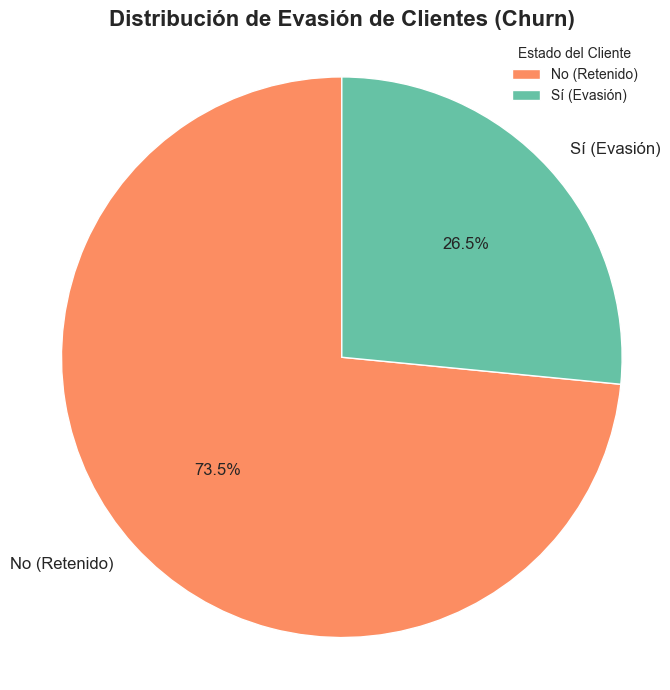

In [96]:
import matplotlib.pyplot as plt

# Mapear 1 → Sí, 0 → No
churn_labels = {1: 'Sí (Evasión)', 0: 'No (Retenido)'}

# Calcular conteos y proporciones
churn_counts = df['Churn'].value_counts()

colors = ['#fc8d62', '#66c2a5']


plt.figure(figsize=(7, 7))
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=16, fontweight="bold")
plt.pie(
    churn_counts,
    labels=[churn_labels[i] for i in churn_counts.index],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12}
)
# Título y leyenda
plt.legend(
    [churn_labels[i] for i in churn_counts.index],
    title='Estado del Cliente',
)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [97]:
# Ahora realizaremos un análisis de las columnas categóricas
cols_categories = df.select_dtypes(include=['object']).columns.tolist()
cols_categories

['Customer_Gender',
 'Phone_MultipleLines',
 'Internet_InternetService',
 'Internet_OnlineSecurity',
 'Internet_OnlineBackup',
 'Internet_DeviceProtection',
 'Internet_TechSupport',
 'Internet_StreamingTV',
 'Internet_StreamingMovies',
 'Account_Contract',
 'Account_PaymentMethod']

In [98]:
df.groupby('Customer_Gender')['Churn'].agg(['count', 'sum', 'mean']).round(3)

,count,sum,mean
Customer_Gender,,,
Female,3488,939,0.269
Male,3555,930,0.262


In [99]:
resumen_tipos(df)

,Column,Tipo,Nulos,Vacíos,Únicos,Top 5 Values
0,Churn,int64,0,0,2,"0, 1"
1,Customer_Gender,object,0,0,2,"Male, Female"
2,Customer_SeniorCitizen,int64,0,0,2,"0, 1"
3,Customer_Partner,int64,0,0,2,"0, 1"
4,Customer_Dependents,int64,0,0,2,"0, 1"
5,Customer_Tenure,int64,0,0,73,"1, 72, 2, 3, 4"
6,Phone_PhoneService,int64,0,0,2,"1, 0"
7,Phone_MultipleLines,object,0,0,3,"No, Yes, No phone service"
8,Internet_InternetService,object,0,0,3,"Fiber optic, DSL, No"
9,Internet_OnlineSecurity,object,0,0,3,"No, Yes, No internet service"


In [100]:
# Obtener las tasas de evasion para las columnas categorías incluso de las numéricas que son consideradas categóricas ya que son int64 con valores únicos <= 5

# Aquí como trabajamos con Churn como 1 y 0 utilizamos mean para calcular la tasa de evasión
# ejemplo de como funciona:
# Female: (1+0+1+0+1)/5 = 0.4 -> 40% de evasión esto representa que el 40% de las mujeres se dieron de baja
# y como el promedio lo realiza pandas asi ya que Churn es 1 y 0, podemos utilizar mean para calcular la tasa de evasión
# y lo mismo con sum -> solo suma los 1s y nos da el total de clientes que se dieron de baja ya que 1 es baja y 0 es retenido
cols_categories = []
for col in df.columns:
  if col != 'Churn' and df[col].dtype in ['object', 'int64'] and df[col].nunique() <= 5:
    cols_categories.append(col)

print(f"Variables categóricas encontradas: {cols_categories}")
print(f"Tasa general de evasión: {df['Churn'].mean():.2%}")
print("-" * 50)
for col in cols_categories:
        # Tabla simple con conteos y tasas
        tabla = df.groupby(col)['Churn'].agg(['count', 'sum', 'mean']).round(3)
        tabla.columns = ['Total', 'Evadidos', 'Tasa_Evasion']
        tabla['Tasa_Evasion'] = tabla['Tasa_Evasion'] * 100  # Convertir a porcentaje
        
        print(f"\n📊 {col.upper()}:")
        print(tabla)

print("\n" + "=" * 50)

Variables categóricas encontradas: ['Customer_Gender', 'Customer_SeniorCitizen', 'Customer_Partner', 'Customer_Dependents', 'Phone_PhoneService', 'Phone_MultipleLines', 'Internet_InternetService', 'Internet_OnlineSecurity', 'Internet_OnlineBackup', 'Internet_DeviceProtection', 'Internet_TechSupport', 'Internet_StreamingTV', 'Internet_StreamingMovies', 'Account_Contract', 'Account_PaperlessBilling', 'Account_PaymentMethod']
Tasa general de evasión: 26.54%
--------------------------------------------------

📊 CUSTOMER_GENDER:
                 Total  Evadidos  Tasa_Evasion
Customer_Gender                               
Female            3488       939          26.9
Male              3555       930          26.2

📊 CUSTOMER_SENIORCITIZEN:
                        Total  Evadidos  Tasa_Evasion
Customer_SeniorCitizen                               
0                        5901      1393          23.6
1                        1142       476          41.7

📊 CUSTOMER_PARTNER:
                  

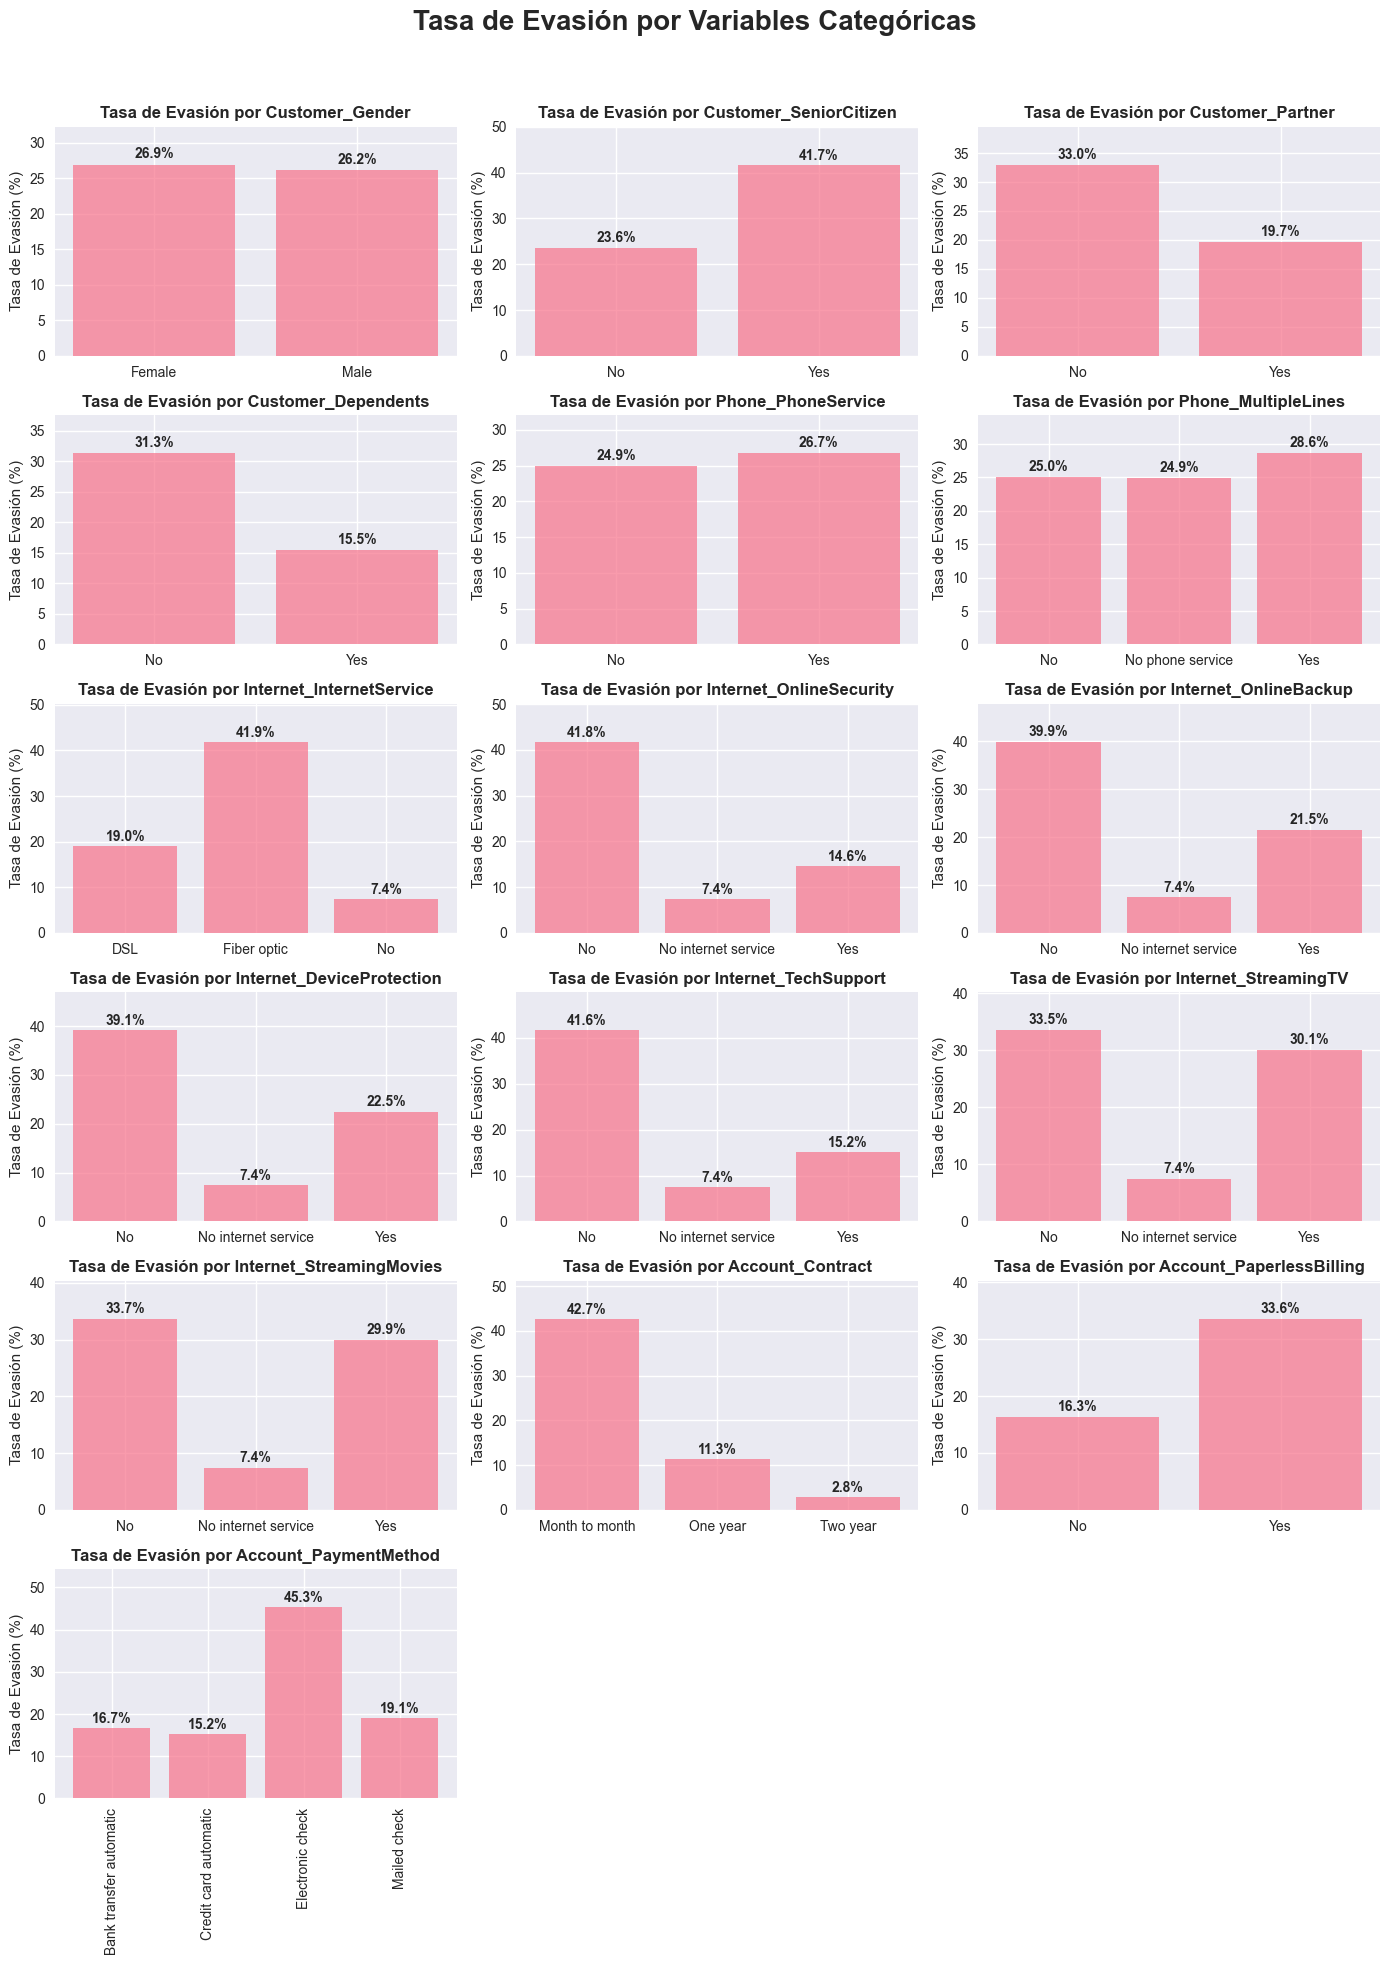

In [106]:
# Realizar las gráficas de barras para cada columna categórica
import matplotlib.pyplot as plt
import math

# Calcular filas y columnas automáticamente
n_vars = len(cols_categories)
n_cols = 3  
n_rows = math.ceil(n_vars / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 20))
fig.suptitle("Tasa de Evasión por Variables Categóricas", fontsize=20, fontweight="bold")
axs = axs.ravel() if n_vars > 1 else [axs]

for i, col in enumerate(cols_categories):
    ax = axs[i]
    tasas = df.groupby(col)['Churn'].mean() * 100
    tasas.index = tasas.index.map(lambda x: "Yes" if x == 1 else ("No" if x == 0 else x))
    bars = ax.bar(tasas.index, tasas.values, alpha=0.7)

    if i == len(cols_categories) - 1:
        ax.tick_params(axis='x', rotation=90)
    for bar, tasa in zip(bars, tasas.values):
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., altura + 0.5,
                f'{tasa:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax.set_title(f'Tasa de Evasión por {col}', fontweight='bold')
    ax.set_ylabel('Tasa de Evasión (%)')
    ax.set_ylim(0, max(tasas.values) * 1.2)
    
for i in range(len(cols_categories), len(axs)):
        axs[i].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### CONTEO DE EVASION POR VARIABLES NUMÉRICAS

In [107]:
import matplotlib.pyplot as plt

def analyze_churn_by_numeric_variables(df, target_col='Churn', numeric_cols=None):
    """
    Analiza la distribución de variables numéricas entre clientes que cancelaron y los que no.
    
    Parameters:
    df: DataFrame con los datos
    target_col: nombre de la columna objetivo (Churn)
    numeric_cols: lista de columnas numéricas a analizar
    """
    
    results = {}
    
    print("=" * 80)
    print("🔍 ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS")
    print("=" * 80)
    # Crear subplots para visualizaciones
    fig, axes = plt.subplots(math.ceil(len(numeric_cols)/ 2), 2, figsize=(14, 7))
    axes = axes.ravel()
    
    for idx, col in enumerate(numeric_cols):
        print(f"\n{'='*60}")
        print(f"📊 ANÁLISIS DE: {col}")
        print(f"{'='*60}")
        
        # 1. Estadísticas descriptivas por grupo
        print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
        stats_by_churn = df.groupby(target_col)[col].describe()
        print(stats_by_churn.round(2))
        
        # 2. Comparación de medias y diferencias
        churn_yes = df[df[target_col] == 1][col].dropna()
        churn_no = df[df[target_col] == 0][col].dropna()
        
        mean_yes = churn_yes.mean()
        mean_no = churn_no.mean()
        
        print(f"\n📈 COMPARACIÓN DE MEDIAS:")
        print(f"   Media (No Churn): {mean_no:.2f}")
        print(f"   Media (Churn): {mean_yes:.2f}")
        print(f"   Diferencia: {abs(mean_yes - mean_no):.2f}")
        print(f"   Diferencia relativa: {((mean_yes - mean_no) / mean_no * 100):.1f}%")
        
        # 3. Crear bins y calcular distribuciones
        try:
            df[f'{col}_bin'] = pd.qcut(df[col], q=5, duplicates='drop')
        except:
            # Si qcut falla, usar cut regular
            df[f'{col}_bin'] = pd.cut(df[col], bins=5)

        
        # Calcular distribuciones porcentuales
        grouped = df.groupby(f'{col}_bin')[target_col].value_counts(normalize=True).unstack().fillna(0) * 100
        results[col] = grouped
        
        print(f"\n📊 DISTRIBUCIÓN POR QUINTILES:")
        print("   (Porcentaje de clientes en cada bin)")
        print(grouped.round(1))
        
        # 4. Identificar bins con mayor riesgo de evasión
        if 1 in grouped.columns:
            highest_churn_bin = grouped[1].idxmax()
            highest_churn_rate = grouped[1].max()
            print(f"\n⚠️  MAYOR RIESGO DE EVASIÓN:")
            print(f"   Rango: {highest_churn_bin}")
            print(f"   Tasa de evasión: {highest_churn_rate:.1f}%")
        
        # 5. Visualizaciones
        axs = axes[idx]
        axs.hist([churn_no, churn_yes], bins=30, alpha=0.7, 
                         label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
        axs.set_title(f'Distribución de {col}')
        axs.set_xlabel(col)
        axs.set_ylabel('Frecuencia')
        axs.legend()
        axs.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
    return results



🔍 ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS

📊 ANÁLISIS DE: Charges_Monthly

📈 ESTADÍSTICAS DESCRIPTIVAS:
        count   mean    std    min    25%    50%   75%     max
Churn                                                         
0      5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
1      1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35

📈 COMPARACIÓN DE MEDIAS:
   Media (No Churn): 61.27
   Media (Churn): 74.44
   Diferencia: 13.18
   Diferencia relativa: 21.5%

📊 DISTRIBUCIÓN POR QUINTILES:
   (Porcentaje de clientes en cada bin)
Churn                   0     1
Charges_Monthly_bin            
(18.249, 25.05]      90.8   9.2
(25.05, 58.83]       75.0  25.0
(58.83, 79.1]        70.2  29.8
(79.1, 94.25]        63.9  36.1
(94.25, 118.75]      67.2  32.8

⚠️  MAYOR RIESGO DE EVASIÓN:
   Rango: (79.1, 94.25]
   Tasa de evasión: 36.1%

📊 ANÁLISIS DE: Charges_Total

📈 ESTADÍSTICAS DESCRIPTIVAS:
        count     mean      std    min    25%      50%      75%      max
Chur

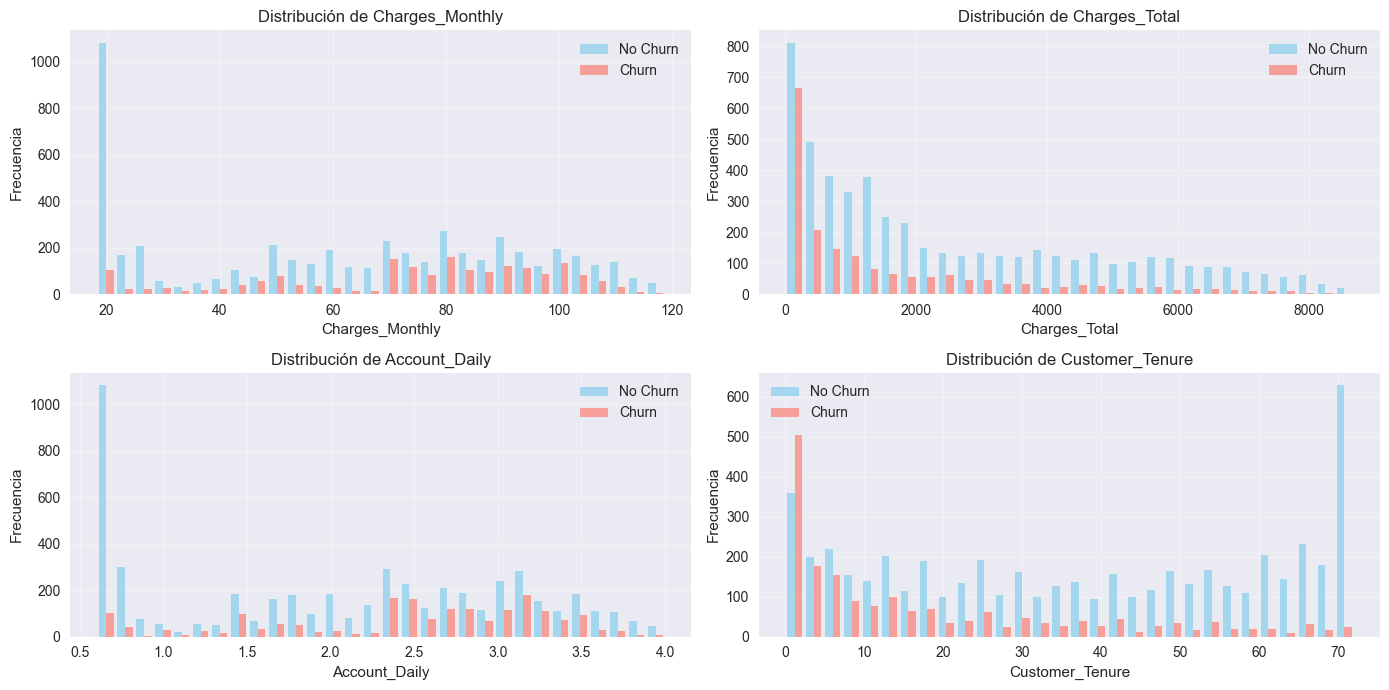

In [109]:
columns = ['Charges_Monthly', 'Charges_Total', 'Account_Daily', 'Customer_Tenure']
results = analyze_churn_by_numeric_variables(df, numeric_cols=columns)

# 📄Informe final

## 1️ Introducción
El objetivo de este análisis es comprender el fenómeno de la **evasión de clientes (Churn)**, es decir, el porcentaje de usuarios que dejan de utilizar los servicios de la empresa.  
Detectar patrones y variables asociadas al abandono es clave para implementar estrategias efectivas de retención y optimizar la satisfacción del cliente.

---

## 2️ Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se siguieron los siguientes pasos:
- **Importación de datos:** Se cargó el dataset con información de clientes, sus características y si han abandonado o no (Churn = 1 indica abandono).
- **Normalizar los nombres de las columnas** Se normalizo la nomenclatura de las columnas.
- **Revisión de valores nulos y duplicados:** Se eliminaron valores faltantes y se descartaron registros duplicados.
- **Estandarización de variables categóricas:** Conversión de valores (`Yes`/`No`) a 1/0 para mejorar la interpretación.
- **Conversión de tipos de datos:** Ajuste de columnas a tipos adecuados (`object`, `float`, `int64`).
- **Creación de la columna Account_Daily:** Se creo la columna para la verificación de gastos diarios del cliente.

---

## 3️ Análisis Exploratorio de Datos (EDA)
Se realizaron diversas exploraciones y visualizaciones para identificar patrones relevantes:

### 🔹 Distribución de Churn
- Se identificó que el **Porcentaje %** de los clientes que abandonaron el servicio.

  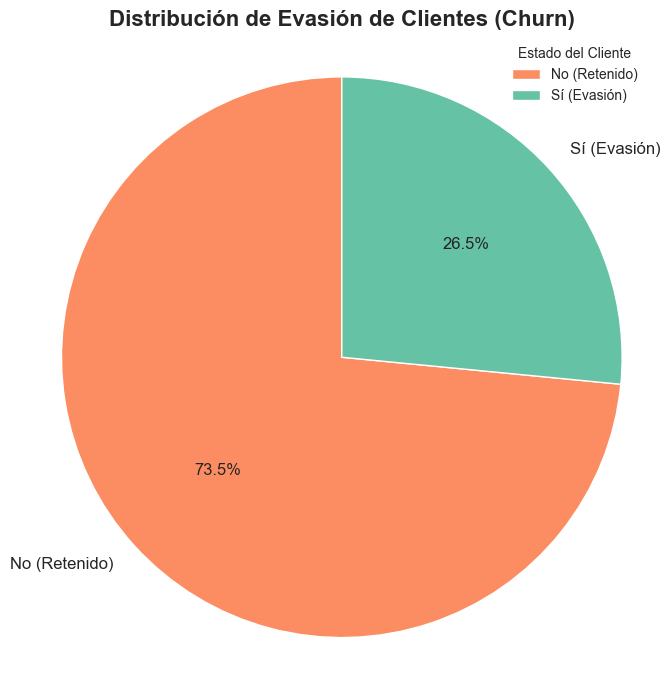

- La proporción de clientes activos es significativamente mayor.

### 🔹 Tasa de Evasión por Variables Categóricas
Se elaboraron gráficos de barras para cada variable categórica y numérica, mostrando el **porcentaje de clientes que abanderan el servicio** para cada categoría.  

Estas visualizaciones permitieron detectar que:
- Algunos grupos presentan **tasas de evasión mucho más altas** que el promedio.
- Factores como el `OnlineSecurity`, `OnlineBackup`, `PaymentMethod`, `Account_Contract` estos y algunos campos mas muestran una alta **tasa de evasion** de clientes.

    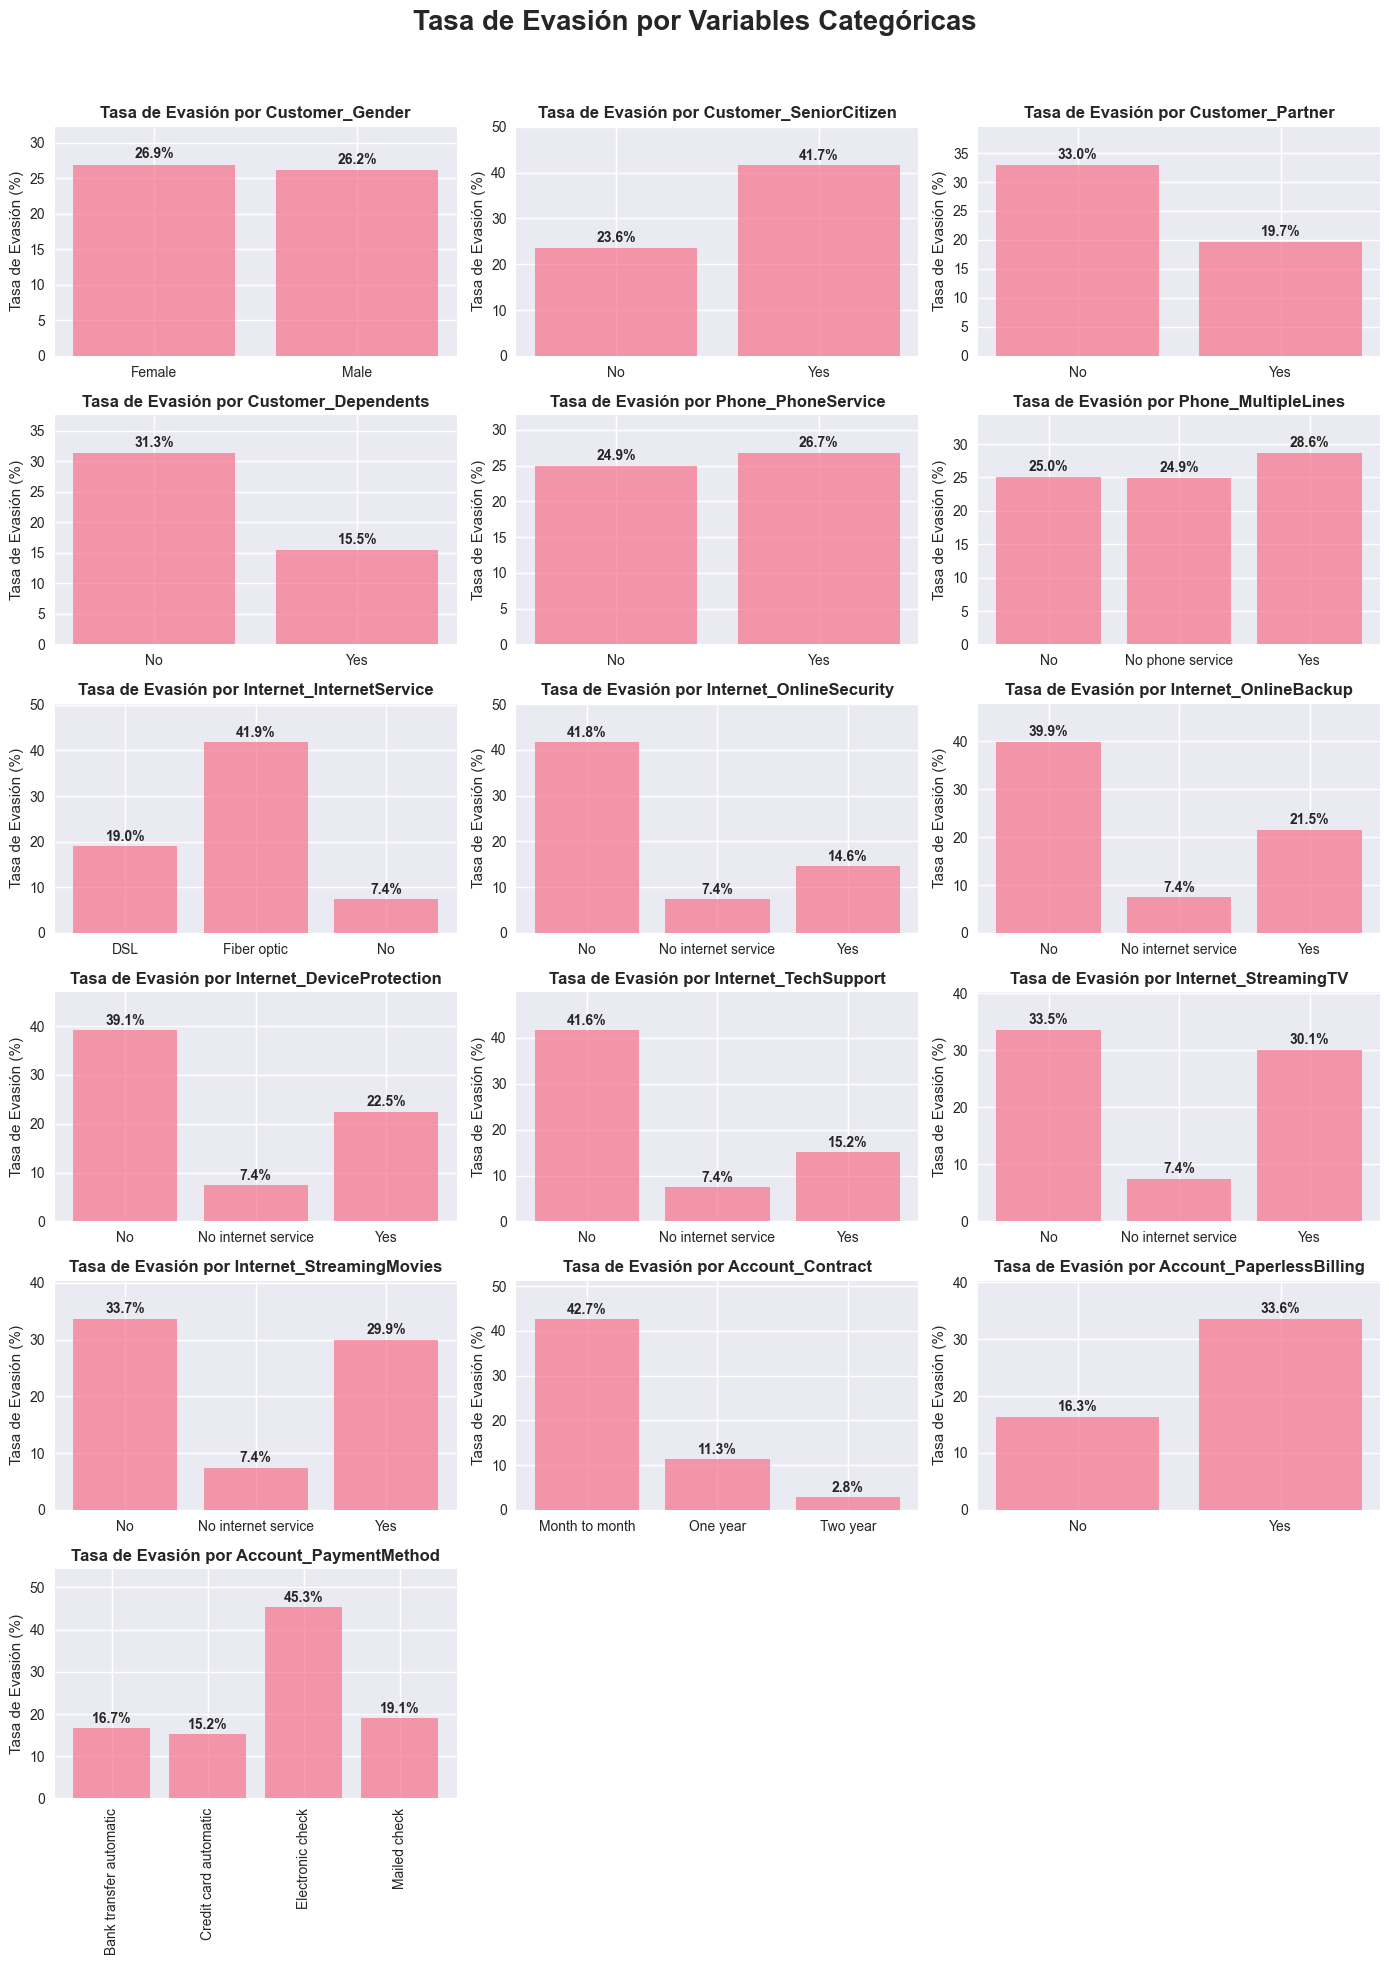


En este caso se muestran los gráficos realizados para las siguientes variables numéricas: `Charges_Monthly`, `Charges_Total`, `Account_Daily`, `Customer_Tenure` donde se agruparon en rangos para poder tener promedios de clientes en diferentes rangos.

  - Como se puede observar en los siguientes datos y grafías.

##  Charges_Monthly (Cargos Mensuales)
### Distribución por Quintiles
| Rango | No Churn (%) | Churn (%) |
|-------|-------------|-----------|
| $18.25 - $25.05 | **90.8** | 9.2 |
| $25.05 - $58.83 | **75.0** | 25.0 |
| $58.83 - $79.10 | **70.2** | 29.8 |
| $79.10 - $94.25 | **63.9** | 36.1 |
| $94.25 - $118.75 | **67.2** | 32.8 |

---

##  Charges_Total (Cargos Totales)
### Distribución por Quintiles
| Rango | No Churn (%) | Churn (%) |
|-------|-------------|-----------|
| $0 - $265.32 | **54.2** | 45.8 |
| $265.32 - $939.78 | **71.1** | 28.9 |
| $939.78 - $2,043.71 | **79.1** | 20.9 |
| $2,043.71 - $4,471.44 | **77.0** | 23.0 |
| $4,471.44 - $8,684.80 | **85.9** | 14.1 |


---

##  Account_Daily (Actividad Diaria de Cuenta)
### Distribución por Quintiles
| Rango | No Churn (%) | Churn (%) |
|-------|-------------|-----------|
| 0.60 - 0.80 | **90.5** | 9.5 |
| 0.80 - 2.00 | **76.0** | 24.0 |
| 2.00 - 2.60 | **66.9** | 33.1 |
| 2.60 - 3.10 | **64.0** | 36.0 |
| 3.10 - 4.00 | **67.4** | 32.6 |

---

##  Customer_Tenure (Permanencia del Cliente)
### Distribución por Quintiles
| Rango | No Churn (%) | Churn (%) |
|-------|-------------|-----------|
| 0 - 6 meses | **47.1** | 52.9 |
| 6 - 20 meses | **66.6** | 33.4 |
| 20 - 40 meses | **77.6** | 22.4 |
| 40 - 60 meses | **84.4** | 15.6 |
| 60 - 72 meses | **93.4** | 6.6 |


  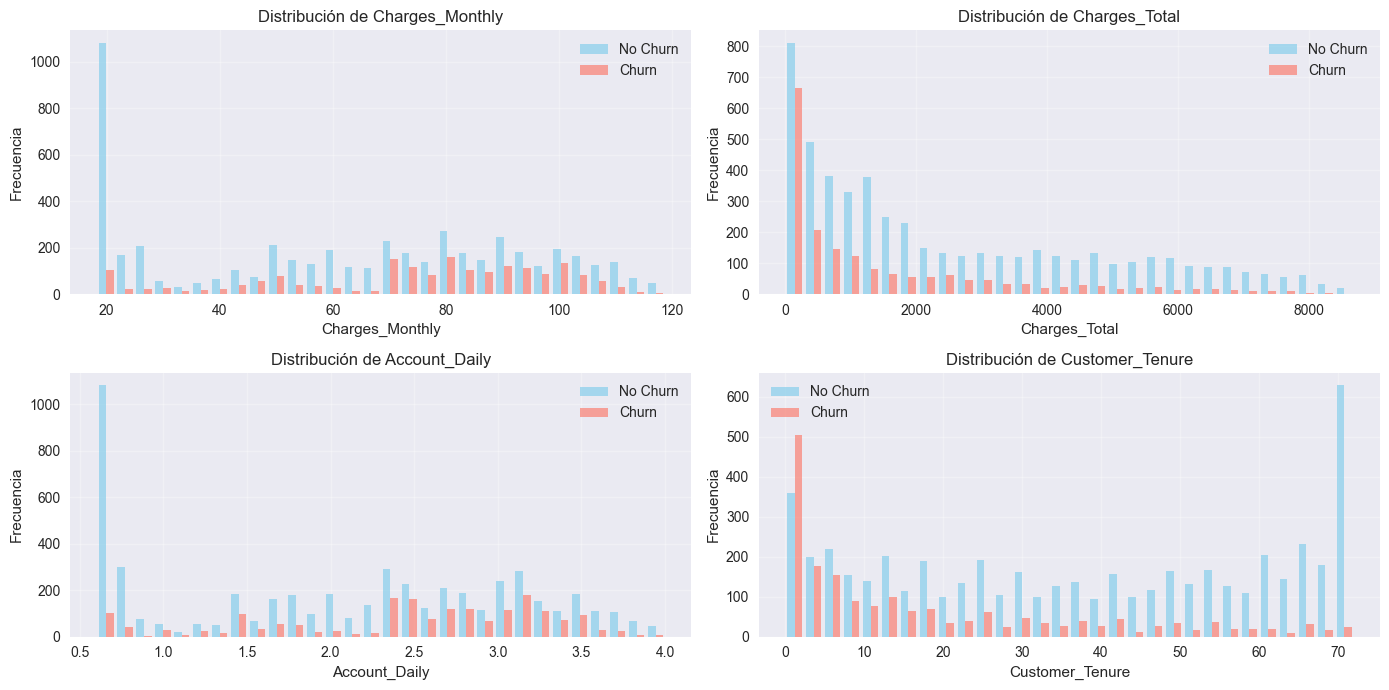

---

## 4️ Conclusiones e Insights
A partir del análisis realizado, se destacan los siguientes hallazgos:

- Los clientes con cargos más bajos ($18-25) tienen la **menor tasa de evasión** (9.2%). El riesgo aumenta significativamente en el rango medio-alto ($79-94).
- **Clientes nuevos** o de bajo valor total son los más propensos a abandonar. Mas del **50%** de clientes nuevos (0-6 meses) abandonan el servicio

- **Fiber Optic:** El servicio premium tiene 41.9% evasión vs 19.0% del DSL básico
- **Electronic Check:** 45.3% de evasión - el peor método de pago por lejos
- **Month-to-Month:** 15x más probabilidad de evasión vs contratos de 2 años
- **Paradoja Digital:** Clientes con facturación digital tienen 17 puntos porcentuales más de evasión que la facturación en papel
- **Senior Citizens:** 41.7% evasión (+15pp vs promedio)
- **Sin Servicios de Seguridad:** 41.8% evasión
- **Clientes Aislados:** Sin pareja ni dependientes tienen tasas de evasion superior al 30%
- **Fiber + Month-to-month + Electronic-check:** Es la combinación mas critica que puede superar mas del 60 % de evasion
- Los Vínculos familiares predicen lealtad
- Los servicios más caro tiene la mayor evasión


---

## 5️ Recomendaciones Estratégicas
Con base al Análisis realizado, se sugieren las siguientes acciones:

  -  Implementar programas de bienvenida y beneficios para nuevos clientes durante sus primeros meses para evitar que sean mas propensos a evadir la empresa.

  -  Ofrecer descuentos o beneficios por cambiar de contratos mensuales a anuales, esto ya que las personas con contratos largos son mas fieles, tomando en cuenta también que existe la posibilidad de que clientes con contratos mensuales que son muchos migren a contratos anuales asegurando asi que sean mas fieles.

  -  Promover y facilitar la suscripción a pagos automáticos para reducir el churn.

  -  Detectar clientes con indicadores de insatisfacción y ofrecerles soporte proactivo.

  -  Crear paquetes de servicios incluyendo el soporte técnico y entretenimiento
  
  -  Mejorar el servicio y soporte para los clientes con servicios premium ya que podemos observar que las personas con fibra óptica tienen mayores tasas de evasion.
